In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.rabi as rabi
import analysis.plotting as plotting
import analysis.analysis as analysis
import standard_sequences.spectroscopy as spec
import standard_sequences.rabi as rabi
import standard_sequences.T1_measurements as T1
import standard_sequences.parametric_coupling as parametric_coupling
import qubit_nonH_cal as qnhc 

In [2]:
wx_addr = wx.get_wx_address()

bnc.set_bnc_output(
    readout_dict["RO_LO"],
    power_dBm=readout_dict["RO_LO_pwr"],
    bnc_addr=bnc_address["target_bnc_black"],
)


In [3]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
readout = Readout(readout_dict)
print(f"{q1}\n{q2}")
# bnc.set_DC_output(bnc_addr=C2_address, voltage=0.01)

Qubit(RO_LO_34=6.4804, ge_time=77, ef_time=46, mixer_offset_ef=6, qubit_id=q1, ge_amp=1, mixer_offset_ge=2.5, ef_ssm=-0.259, ro_freq=6.72734, IQ_angle=60, ROIF=0.10264000000000006, RO_LO_pwr=16, ro_amp=0.25, ef_half_time=25, RO_LO=6.6247, ef_amp=1.5, RO_IF=None, ro_dur=5000, RO_LO_45=6.3804, ge_ssm=-0.117, ef_half_amp=1.3, qubit_thr=[-10000, -600])
Qubit(RO_LO_34=6.4804, ge_time=62, ef_time=None, mixer_offset_ef=None, qubit_id=q2, ge_amp=1, mixer_offset_ge=2.5, ef_ssm=-0.2962, ro_freq=6.6554, IQ_angle=25, ROIF=0.030700000000000394, RO_LO_pwr=16, ro_amp=0.6, ef_half_time=None, RO_LO=6.6247, ef_amp=1, RO_IF=None, ro_dur=5000, RO_LO_45=6.3804, ge_ssm=-0.155, ef_half_amp=None, qubit_thr=[-10000, 1900])


writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 101
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 101
Records per pattern: 2000
Buffers per acquistion: 66
DAQ samples per pattern: 8192
0, No error
Capturing 66 buffers. Press <enter> to abort
Capture completed in 41.255744 sec
Captured 66 buffers (1.599777 buffers per sec)
Captured 202752 records (4914.515720 records per sec)
Transferred 3321888768 bytes (80519425.561013 bytes per sec)


<Figure size 800x800 with 0 Axes>

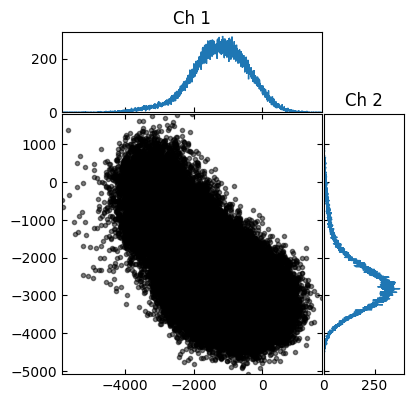

<Figure size 800x800 with 0 Axes>

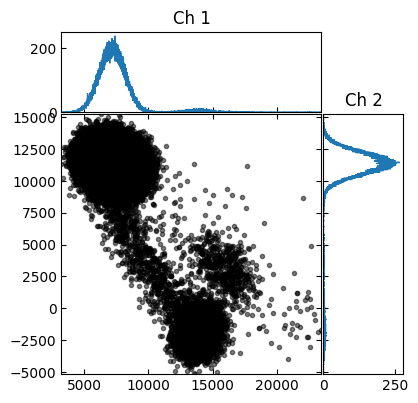

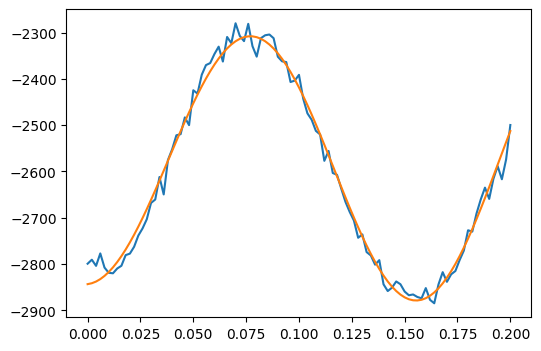



  freq: 6.378815990326803 +/- 0.029777759503980816
 gamma: -0.8061878253931014 +/- 0.21620760258080152
   amp: -259.650363981361 +/- 6.209857017289273
 phase: 94.30321106407477 +/- 1.3544916133475189
offset: -2584.2839765199587 +/- 2.3350081766406268
pi_pulse time: 0.07838445265676706 +/- 0.029777759503980816
Results saved to c:\Users\quantum1\OneDrive\Documents\Python Scripts\Important Blue Fridge Python Files\New\Blue_fridge\optimization_logs\optimization_parameters_20250528_223913.txt
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 101
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 101
Records per pattern: 2000
Buffers per acquistion: 66
DAQ samples per pattern: 8192
0, 

<Figure size 800x800 with 0 Axes>

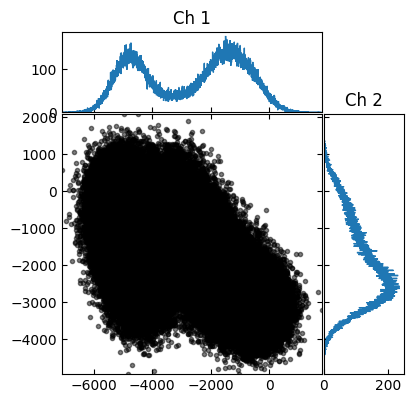

<Figure size 800x800 with 0 Axes>

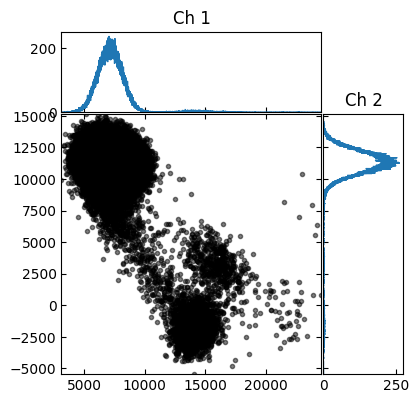

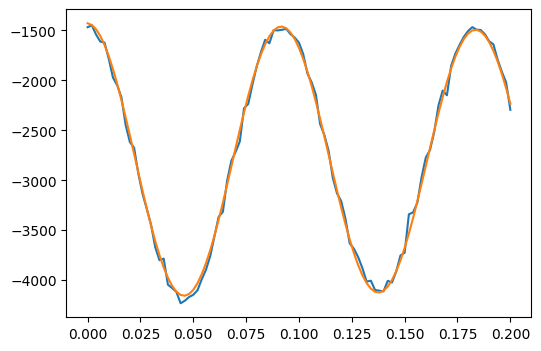



  freq: 10.87460059144035 +/- 0.01733066820648436
 gamma: 0.26377674446839866 +/- 0.09766450757170445
   amp: 1372.5139896162136 +/- 15.40192421017212
 phase: 91.16256573731539 +/- 0.695495202223479
offset: -2800.301759659072 +/- 5.697856220284136
pi_pulse time: 0.045978700164267326 +/- 0.01733066820648436
Results saved to c:\Users\quantum1\OneDrive\Documents\Python Scripts\Important Blue Fridge Python Files\New\Blue_fridge\optimization_logs\optimization_parameters_20250528_224051.txt


In [4]:
num_steps = 101
sweep_time = 200
reps = 2000

# Run Rabi in ge manifold
ge_vals, ge_df, ge_rabi_amp, ge_pi_time = qnhc.run_rabi(
    q1, q2, general_vals_dict, num_steps, sweep_time, reps, manifold="ge"
)

# Run Rabi in ef manifold
ef_vals, ef_df, ef_rabi_amp, ef_pi_time = qnhc.run_rabi(
    q1, q2, general_vals_dict, num_steps, sweep_time, reps, manifold="ef"
)

initial_amp = q1.ge_amp
initial_time = ge_pi_time


In [5]:
 #validating the amp and time parameters using gp minimize on a bang bang sequence in ge manifold
optimal_amp, optimal_time, result = qnhc.optimize_pi_pulse(
    q1, q2, general_vals_dict, reps, initial_amp, initial_time, manifold="ge"
)

print(f"Optimal amplitude: {optimal_amp}")
print(f"Optimal time: {optimal_time}")
print(f"Best score: {result.fun}")

print(f"Amplitude Difference: {np.abs(ge_rabi_amp - optimal_amp)}")
print(f"Time Difference: {np.abs(ge_pi_time - optimal_time)}")

q1.ge_time = optimal_time
q1.ge_amp = optimal_amp
q1.ef_time = optimal_time
q1.ef_amp = optimal_amp



Starting new optimization. Checkpoints will be saved to c:\Users\quantum1\OneDrive\Documents\Python Scripts\Important Blue Fridge Python Files\New\Blue_fridge\gp_minimize_checkpoint_ge.pkl
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 2000
Buffers per acquistion: 2
DAQ samples per pattern: 8192
0, No error
Capturing 2 buffers. Press <enter> to abort
Capture completed in 1.949357 sec
Captured 2 buffers (1.025979 buffers per sec)
Captured 6144 records (3151.808081 records per sec)
Transferred 100663296 bytes (51639223.598206 bytes per sec)


PicklingError: Can't pickle <function optimize_pi_pulse.<locals>.minimization_function at 0x000002B680A414E0>: it's not found as qubit_nonH_cal.optimize_pi_pulse.<locals>.minimization_function

In [ ]:
sweep_amp_center = 1
sweep_freq_center = -0.020
num_steps = 201
reps  = 2000
swap_optimal_freq, swap_optimal_time, swap_optimal_amp, swap_result = qnhc.optimize_swap_gate(q1, q2, general_vals_dict, reps, initial_freq, initial_amp)



